# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")
display(crops.head())


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [2]:
# Checking for missing values in the dataset
crops.isna().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [3]:
# Displaying the data types of each column in the 'crops' DataFrame
crops.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    crops[["N", "P", "K", "ph"]], 
    crops["crop"],               
    test_size=0.2,                 
    random_state=42               
)

# Iterating over each feature to train a logistic regression model
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,              
        multi_class="multinomial",  
    )
    
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    # Calculating the F1-score to evaluate the model's performance
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


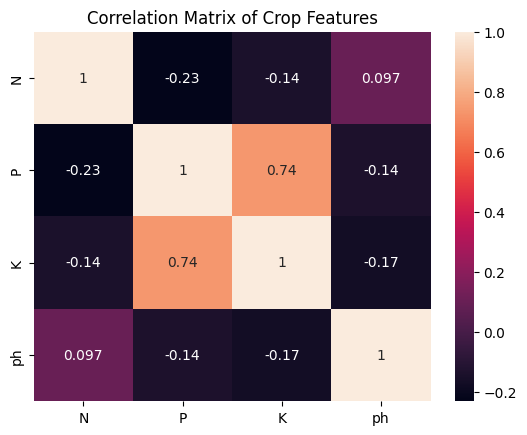

In [8]:
# Plotting the correlation matrix of the features in the 'crops' DataFrame
sns.heatmap(crops[["N", "P", "K", "ph"]].corr(), annot=True)

# Displaying the plot
plt.title("Correlation Matrix of Crop Features") 
plt.show()

In [9]:
# Select the final features for the model
final_features = ["N", "K", "ph"]

# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")

model_performance

0.558010495235685